In [3]:
import os
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import urllib.request
import json

In [4]:
sta = {
        "lon":[199.496,197.6741,183.382,185.827,191.129,193.460,189.715,199.197,194.535,182.532,175.261,179.764,187.855,187.988,199.206,194.521,194.521],
        "lat":[55.332,55.060,51.861,52.222,52.941,53.879,57.125,63.871,64.495,57.034,55.050,51.040,51.645,55.008,53.969,64.474,64.474],
        "depth":[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1],
        "code":[9459450,9459881,9461380,9461710,9462450,9462620,9464212,9468333,9468756,46035,46070,46071,46072,46073,46075,46265,462651],
        "source":['CO-OPS','CO-OPS','CO-OPS','CO-OPS','CO-OPS','CO-OPS','CO-OPS','CO-OPS','CO-OPS','NDBC','NDBC','NDBC','NDBC','NDBC','NDBC','NDBC','NDBC'],
        "name":['Sand Point','King Cove','Adak Island','Atka','Nikolski','Unalaska','Village Cove','Unalakleet','Nome','Central Bering Sea','Southwest Bering Sea','Western Aleutians','Central Aleutians','Southeast Bering Sea','Shumagin Islands','Nome','Nome'],
        "elev":[True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,],
        "temp":[True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,False,],
        "curr":[False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,],
        "wave":[False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,False,],
       }

In [5]:
R09a_path = r"C:\Users\Felicio.Cassalho\Work\Modeling\AK_Project\WaveCu_paper\R09a\outputs/"
R09b_path = r"C:\Users\Felicio.Cassalho\Work\Modeling\AK_Project\WaveCu_paper\R09b\outputs/"
R09c_path = r"C:\Users\Felicio.Cassalho\Work\Modeling\AK_Project\WaveCu_paper\R09c\outputs/"
R10a_path = r"C:\Users\Felicio.Cassalho\Work\Modeling\AK_Project\WaveCu_paper\R10a\outputs/"
R10b_path = r"C:\Users\Felicio.Cassalho\Work\Modeling\AK_Project\WaveCu_paper\R10b\outputs/"
R10c_path = r"C:\Users\Felicio.Cassalho\Work\Modeling\AK_Project\WaveCu_paper\R10c\outputs/"

In [6]:
R09a = pd.read_csv(R09a_path+'staout_1', sep='\s+', header=None, names=["datetime"]+sta['code'])
R09a['datetime'] = pd.to_datetime('2019-07-01T12:00:00') + pd.to_timedelta(R09a['datetime'], unit='s')
R09a = R09a.iloc[:, :10]
R09a = R09a.set_index('datetime')

R09b = pd.read_csv(R09b_path+'staout_1', sep='\s+', header=None, names=["datetime"]+sta['code'])
R09b['datetime'] = pd.to_datetime('2019-07-01T12:00:00') + pd.to_timedelta(R09b['datetime'], unit='s')
R09b = R09b.iloc[:, :10]
R09b = R09b.set_index('datetime')

R09c = pd.read_csv(R09c_path+'staout_1', sep='\s+', header=None, names=["datetime"]+sta['code'])
R09c['datetime'] = pd.to_datetime('2019-07-01T12:00:00') + pd.to_timedelta(R09c['datetime'], unit='s')
R09c = R09c.iloc[:, :10]
R09c = R09c.set_index('datetime')

R10a = pd.read_csv(R10a_path+'staout_1', sep='\s+', header=None, names=["datetime"]+sta['code'])
R10a['datetime'] = pd.to_datetime('2019-07-01T12:00:00') + pd.to_timedelta(R10a['datetime'], unit='s')
R10a = R10a.iloc[:, :10]
R10a = R10a.set_index('datetime')

R10b = pd.read_csv(R10b_path+'staout_1', sep='\s+', header=None, names=["datetime"]+sta['code'])
R10b['datetime'] = pd.to_datetime('2019-07-01T12:00:00') + pd.to_timedelta(R10b['datetime'], unit='s')
R10b = R10b.iloc[:, :10]
R10b = R10b.set_index('datetime')

R10c = pd.read_csv(R10c_path+'staout_1', sep='\s+', header=None, names=["datetime"]+sta['code'])
R10c['datetime'] = pd.to_datetime('2019-07-01T12:00:00') + pd.to_timedelta(R10c['datetime'], unit='s')
R10c = R10c.iloc[:, :10]
R10c = R10c.set_index('datetime')

In [14]:
## Major event: Good in Village Cove
start_str = '2019-10-13T00:00:00'
end_str = '2019-10-18T00:00:00'

# # Good in Nome:
start_str = '2019-09-10T00:00:00'
end_str = '2019-09-17T00:00:00'

# # # Good in Nome:
start_str = '2019-09-24T00:00:00'
end_str = '2019-09-30T00:00:00'

# # Good in Unalakleet:
start_str = '2019-10-03T00:00:00'
end_str = '2019-10-11T00:00:00'

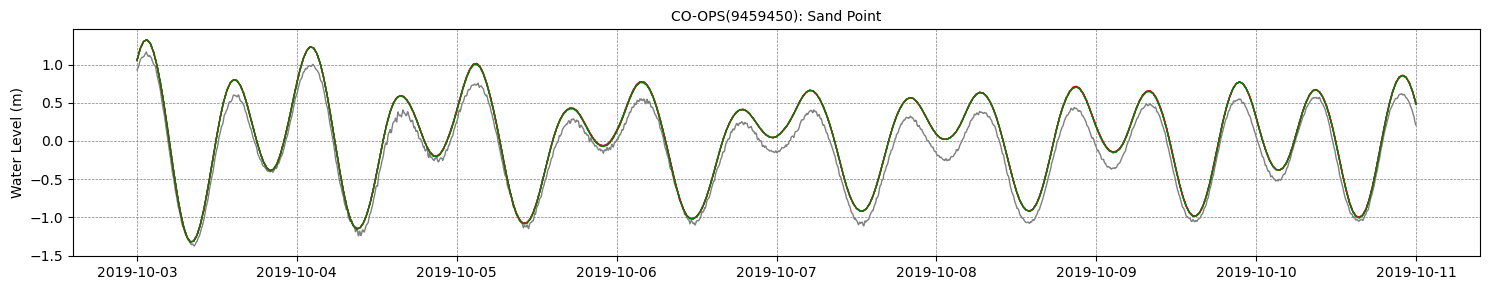

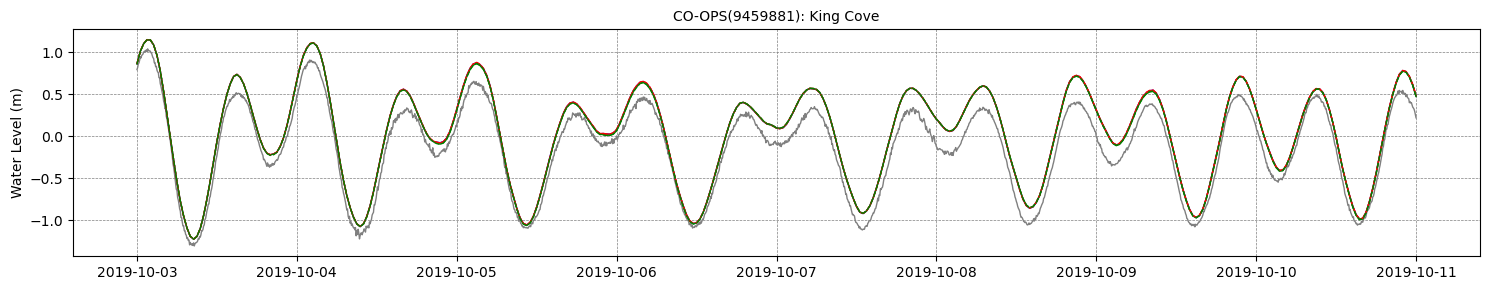

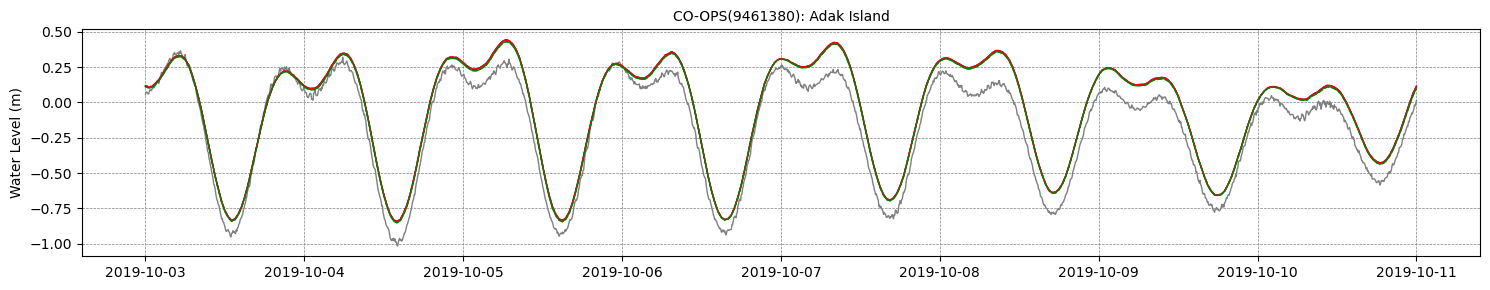

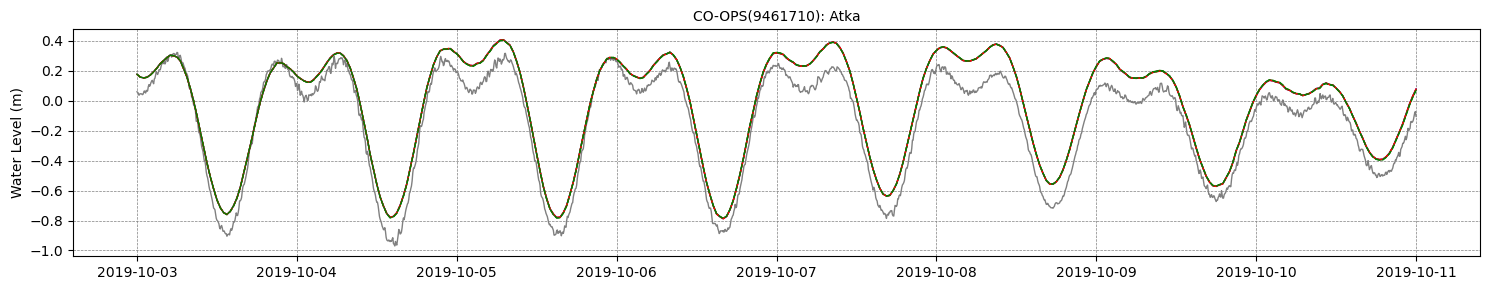

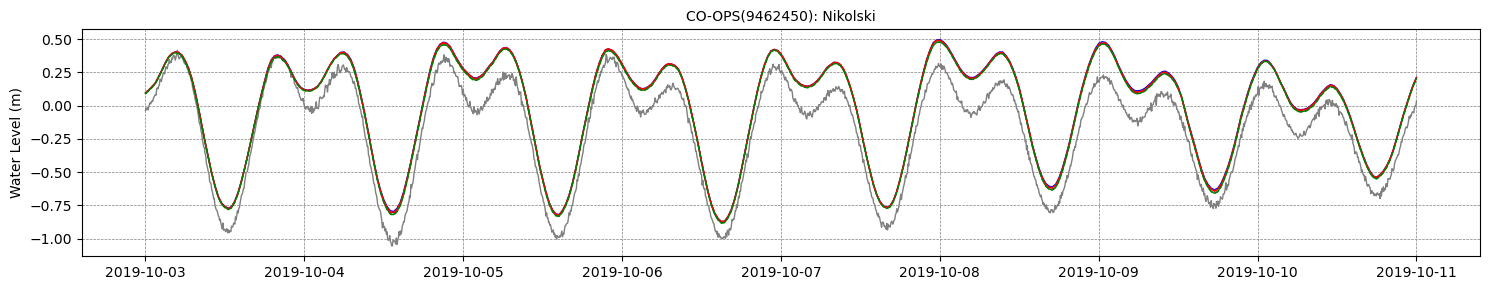

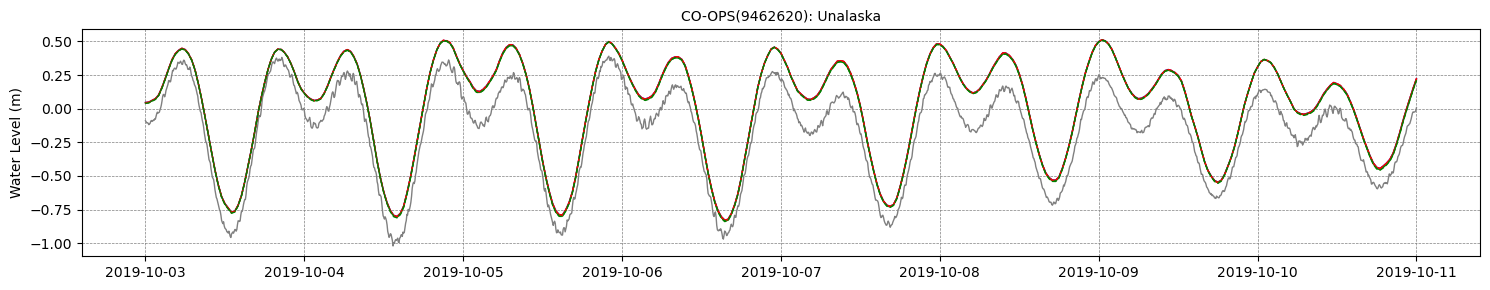

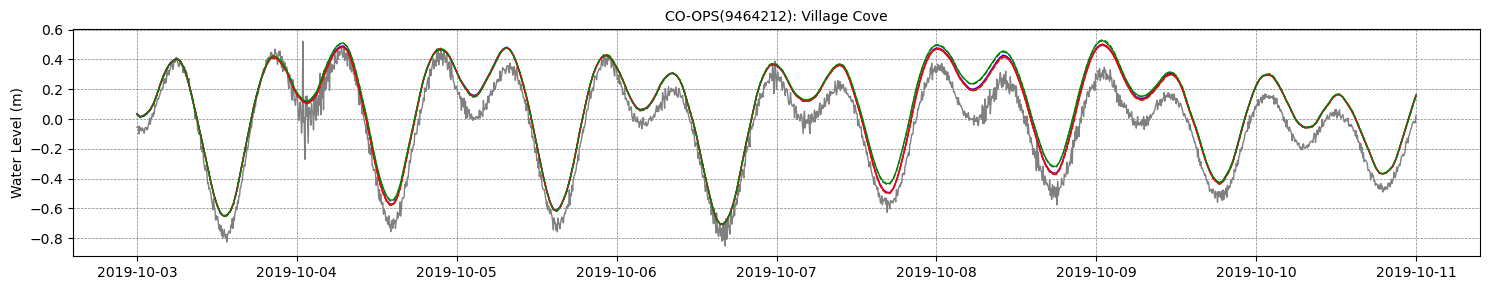

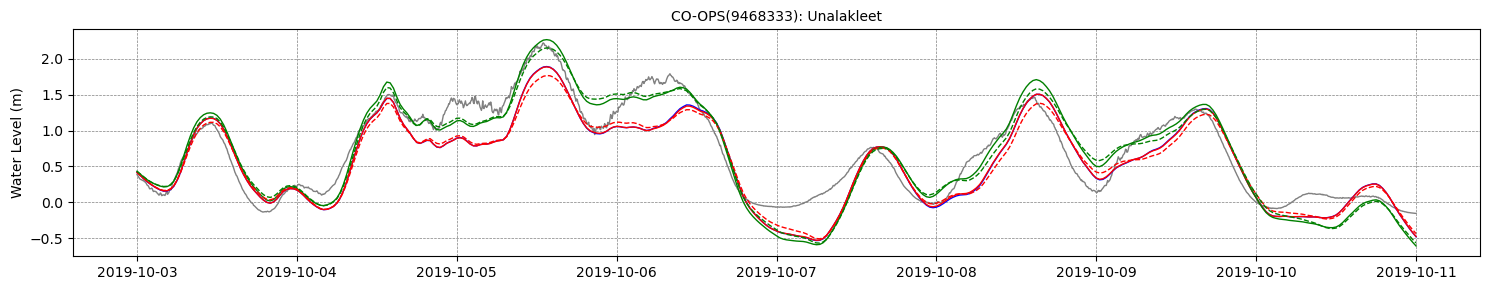

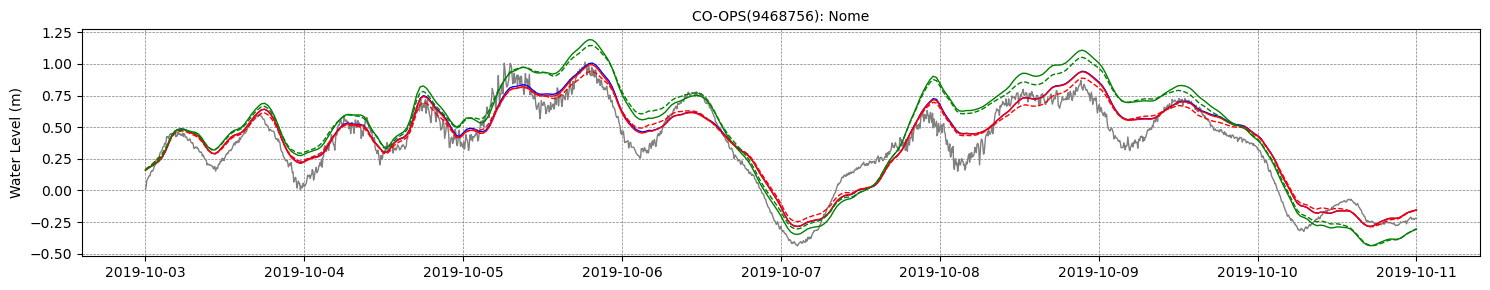

In [15]:
for i,n in enumerate(sta['code'][:9]):
    date_i = start_str.split('-')[0]+start_str.split('-')[1]+start_str.split('-')[2][:2]
    date_f = end_str.split('-')[0]+end_str.split('-')[1]+end_str.split('-')[2][:2]
    t_c_station_url = (
                    f"https://api.tidesandcurrents.noaa.gov/api/prod/datagetter?begin_date="
                    f"{date_i}&end_date={date_f}&station="
                    f"{n}&product=water_level&datum="
                    f"MSL&time_zone=gmt&units="
                    f"metric&format=json"
                )
    
    with urllib.request.urlopen(t_c_station_url) as t_c_station_url:
        obs = json.load(t_c_station_url)
    t_c_date, t_c_var, t_c_drt = [], [], []
    for l in range(len(obs["data"])):
        t_c_date.append(obs["data"][l]["t"])
        t_c_var.append(obs["data"][l]["v"])
    
    obs = pd.DataFrame(
        {
            "datetime": pd.to_datetime(t_c_date),
            "OBS": pd.to_numeric(t_c_var),
        }
    )
    obs.set_index('datetime', inplace=True)
    
    obs_sel = obs.loc[start_str:end_str]
    R09a_sel = R09a.loc[start_str:end_str]
    R09b_sel = R09b.loc[start_str:end_str]
    R09c_sel = R09c.loc[start_str:end_str]
    R10a_sel = R10a.loc[start_str:end_str]
    R10b_sel = R10b.loc[start_str:end_str]
    R10c_sel = R10c.loc[start_str:end_str]
    
    plt.figure(figsize=(15, 3))
    
    plt.plot(obs_sel.index, obs_sel['OBS'], label='Observed', color='gray', linewidth=1)
    plt.plot(R09a_sel.index, R09a_sel[n], label='Uncoupled', color='blue', linewidth=1, linestyle='-')
    plt.plot(R09b_sel.index, R09b_sel[n], label='No WW3 Bound: LON', color='red', linewidth=1, linestyle='-')
    plt.plot(R09c_sel.index, R09c_sel[n], label='No WW3 Bound: VOR', color='green', linewidth=1, linestyle='-')
    # plt.plot(R10a_sel.index, R10a_sel[n], label='WW3 Bound: Uncoupled', color='blue', linewidth=1, linestyle='--')
    plt.plot(R10b_sel.index, R10b_sel[n], label='WW3 Bound: LON', color='red', linewidth=1, linestyle='--')
    plt.plot(R10c_sel.index, R10c_sel[n], label='WW3 Bound: VOR', color='green', linewidth=1, linestyle='--')
    
    plt.title(f"{sta['source'][i]}({sta['code'][i]}): {sta['name'][i]}",fontsize=10)
    # plt.xlabel('Time')
    plt.ylabel('Water Level (m)')
    # plt.legend()
    plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
    # plt.legend(loc='lower left')
    plt.tight_layout()
    
    # plt.savefig(r"C:\Users\Felicio.Cassalho\Work\Modeling\AK_Project\WaveCu_paper\Figures\timeseries/Hs_LON_fullycoup_vs_Uncoup_2019.jpeg", dpi=300)
    plt.show()